# Visualizing SNODAS data

In [57]:
%matplotlib widget
import matplotlib.pyplot as plt
import glob
import cartopy
import rasterio
import numpy

# Location

- We got the data from https://noaadata.apps.nsidc.org/NOAA/G02158/.
- Those come as tarred EVNI binary format https://nsidc.org/data/user-resources/help-center/how-do-i-convert-snodas-binary-files-geotiff-or-netcdf)
- We extracted them and converted them to geotiffs at the following location
- Each folder contains granules of the same variable

In [58]:
glob.glob('/bayesics/p4/source/snodas/*')

['/bayesics/p4/source/snodas/ssmv11038wS__A0024',
 '/bayesics/p4/source/snodas/ssmv11044bS__T0024',
 '/bayesics/p4/source/snodas/ssmv11034tS__T0001',
 '/bayesics/p4/source/snodas/ssmv11050lL00T0024',
 '/bayesics/p4/source/snodas/ssmv01025SlL00T0024',
 '/bayesics/p4/source/snodas/ssmv11039lL00T0024',
 '/bayesics/p4/source/snodas/ssmv11036tS__T0001',
 '/bayesics/p4/source/snodas/ssmv01025SlL01T0024']

#  Naming convention
From:
https://nsidc.org/data/g02158/versions/1

Product:
- 1025: Precipitation
- 1034: Snow water equivalent
- 1036: Snow depth
- 1038: Snow pack average temperature
- 1039: Blowing snow sublimation
- 1044: Snow melt
- 1050: Snow pack sublimation

Driving Variable:
- lL00: Non-snow (liquid) precipitation
- lL01: Snow precipitation.
- lL00: Fluxes to and from the snow surface such as sublimation
- tS__: Integral through all the layers of the snow pack
- bS__: Bottom of the snow pack such as snow melt
- wS__: Snow-water-equivalent-weighted average of the snowpack layers


## Example
Filename: `us_ssmv11034tS__T0001TTNATS2016120105HP001`:


- ssmv11038wS__A0024: 
    - us_: united states; duh
    - ssm: simple snow model
    - v1: Operational snow model output
    - 1034: Snow water equivalent
    - tS__: Integral through all the layers of the snow pack
    - T0001: A one-hour snapshot (generally used for states, such as SWE)
    - TTNA: Detail of snow modeling operations
    - TS: time step
    - 2016120105: 2016-12-01 05:00
    - H: hourly interval
    - P001: field represents a total flux for the entire time step such as precipitation or that a field represents data at the end of a time step.

# SWE
We are reading in SWE data; i.e. files from the `*1034*/` folder

In [59]:
files = sorted(glob.glob('/bayesics/p4/source/snodas/ssmv11034tS__T0001/*'))
files[0]

'/bayesics/p4/source/snodas/ssmv11034tS__T0001/us_ssmv11034tS__T0001TTNATS2016120105HP001.tif'

In [60]:
def get_geotiff(file_path):        
    with rasterio.open(file_path) as src:
        raster = src.read()
        extent = (src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3])
    raster = numpy.ma.masked_where(raster<=0, raster) # NoData value is -9999
    raster = numpy.transpose(raster, (1, 2, 0))
    return raster, extent

In [61]:
raster, extent = get_geotiff(files[0])

In [63]:
lon_0_global = 180
lat_0_global = 90.0

geod_crs = cartopy.crs.Geodetic(globe=cartopy.crs.Globe())
polar_crs = cartopy.crs.LambertAzimuthalEqualArea(central_longitude=lon_0_global, central_latitude=lat_0_global, globe=cartopy.crs.Globe())
pc_crs = cartopy.crs.PlateCarree()

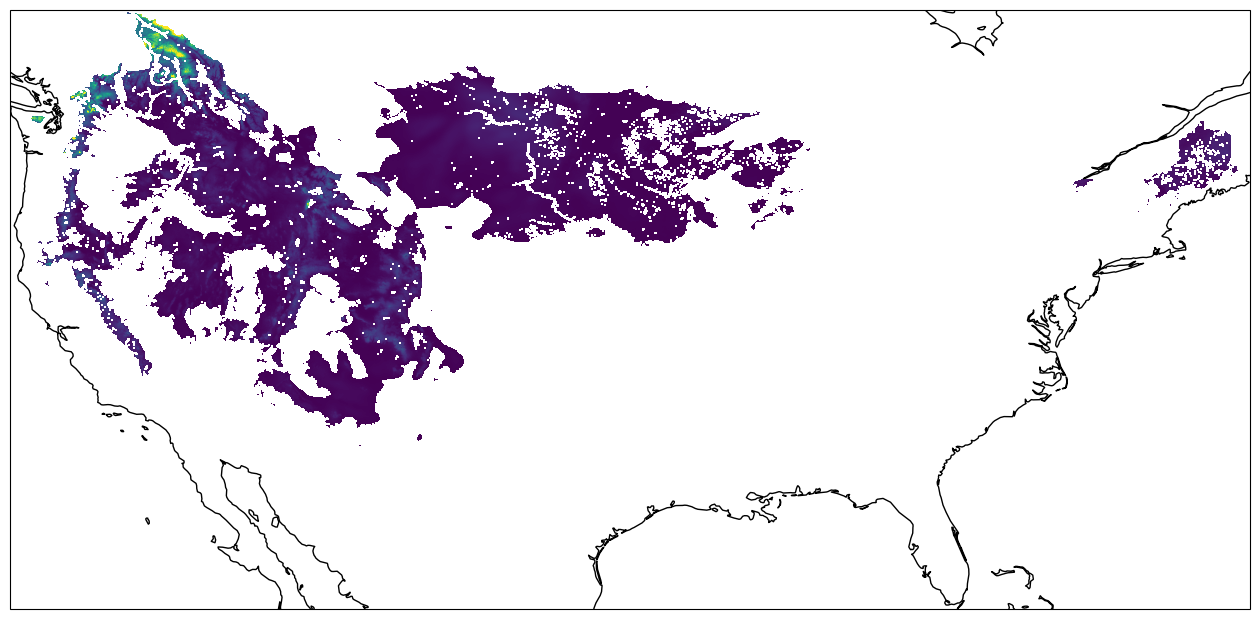

In [68]:
opts = {'projection': pc_crs}
fig, ax = plt.subplots(figsize=(16, 9), dpi=100, subplot_kw=opts)

ax.coastlines()

goes = ax.imshow(raster,  origin='upper', extent=extent, transform=pc_crs, cmap='viridis', vmin=0, vmax=500)